# Oja's rule

Import the packages

In [1]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import time

Load and centralise the data. Extend the original 2D dataset to 3-dimensional space with 0 in the z-axis.

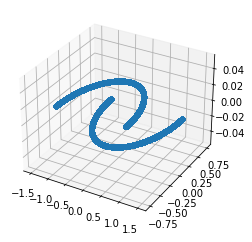

In [2]:
x=datasets.make_moons(n_samples=1000000)[0]
y=np.zeros((1000000,1))
x=np.concatenate((x,y),axis=1)
x=x-np.mean(x,axis=0)

ax = plt.axes(projection='3d')
ax.scatter3D(x[:,0],x[:,1],x[:,2])
plt.show()

### The Oja's Algorithm

For i in 1,2,3,....\
\
$V_i=V_{i-1}+\eta x_i^Tx_iV_{i-1}$\
QR factorise $V_i$, $QR=V_i$\
$V_i=Q$
    

In [3]:
def oja(X,eta):
    
    t,length = X.shape
    V = np.random.randn(length,2)
    V,_ = np.linalg.qr(V, mode='reduced')
    Vp = V.copy()
    
    for i in range(t):
        temp=X[i,:]
        temp=temp.reshape((1,len(temp)))
        V += eta*np.dot(temp.T,temp)@V
        
        '''
        if np.linalg.norm(Vp-V)/np.linalg.norm(V) <1e-6:
            break
        else:
            Vp=V.copy()
        '''
        
        V,_ = np.linalg.qr(V, mode='reduced')
        
    return V

### PCA computed by the Oja's method

In [4]:
oja_start = time.time()
oja_pca=oja(X = x,eta = 0.001)
oja_end = time.time()
print('Time taken for Oja',oja_end-oja_start)
print(oja_pca)

Time taken for Oja 53.49987196922302
[[-9.47373210e-001 -3.20131224e-001]
 [ 3.20131224e-001 -9.47373210e-001]
 [ 1.14623230e-321  1.02540322e-078]]


### PCA function in sklearn

In [5]:
pca_start = time.time()
pca = PCA(n_components=3)
pca.fit(x)
pca_end = time.time()
print('Time taken for PCA',pca_end-pca_start)
print('varaince ratio:')
print(pca.explained_variance_ratio_)
print('princeple component:')
print(pca.components_)

Time taken for PCA 0.09157848358154297
varaince ratio:
[0.82018332 0.17981668 0.        ]
princeple component:
[[-0.94723096  0.32055188 -0.        ]
 [ 0.32055188  0.94723096  0.        ]
 [ 0.          0.          1.        ]]


## Rotation in 3D space

Generate a random $3\times 3$ rotation matrix by Scipy function

In [10]:
'''
temp=np.random.uniform(-1,1,[3,3])
r,_ = np.linalg.qr(temp)
'''
from scipy.stats import special_ortho_group

r = special_ortho_group.rvs(3)
xr=x@r

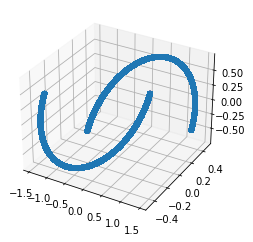

In [11]:
ax = plt.axes(projection='3d')
ax.scatter3D(xr[:,0],xr[:,1],xr[:,2])
plt.show()

In [12]:
print('oja algorihtm:')
print(oja(X = xr,eta = 0.001))
temp=oja_pca.T@r
print('rotated components')
print(temp.T)

oja algorihtm:
[[-0.90730153  0.31895659]
 [-0.35233316 -0.2210575 ]
 [-0.22948918 -0.92162914]]
rotated components
[[ 0.90730153  0.31895659]
 [ 0.35233316 -0.2210575 ]
 [ 0.22948918 -0.92162914]]


In [13]:
pca_start = time.time()
pca_r = PCA(n_components=3)
pca_r.fit(xr)
pca_end = time.time()
print('Time taken for PCA',pca_end-pca_start)
print('varaince ratio:')
print(pca_r.explained_variance_ratio_)
print('princeple component:')
print(pca_r.components_)

Time taken for PCA 0.08407163619995117
varaince ratio:
[8.20183321e-01 1.79816679e-01 1.14159344e-30]
princeple component:
[[-0.9071598  -0.35243129 -0.22989841]
 [ 0.31935946 -0.22090102 -0.92152714]
 [ 0.27399021 -0.90939261  0.31294479]]
